# K-means

### Data preparation

First lets import all libraries that we will later use.

Also lets enable IPython's matplotlib inline mode to show plots.

In [24]:
from __future__ import division

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score

%matplotlib inline

Using sklearn make_blobs lets generate dataset for testing.

Here we define that we want 2 features, 300 samples and 3 classes with std 1 and also we pass 0 as random seed, so that data always generates same.

Finally lets plot generated points.

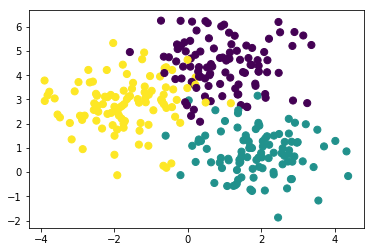

In [25]:
classesCount = 3
sampleCount = 300
x, y = make_blobs(n_samples=sampleCount, centers=classesCount, n_features=2, cluster_std=1, random_state=0)

plt.scatter(x[:, 0], x[:, 1], c=y, s=50)

### Actual K-means implementation

First step is to initialize parameters for K-means algorithm.

It is done by first getting data feature count and sample count. Then initialize centroids by generating matrix (feature count x classes count) size that contains random variables(values between 0 and 1) and then mulitplying them by maximum value of data.

Distances are initialized as zeros matrix.

In [26]:
xCopy = x.copy()
xCopy = xCopy.T
featureCount, sampleSize = xCopy.shape

centroids = np.random.rand(featureCount, classesCount) * x.max()
oldDistances = np.zeros((classesCount, sampleSize))

After parameters are initiazized we can go to algorithm itself.

It consists of 3 main steps that are done iteratively until there distances stop to change.

* Step 1:

In this step we need to calculate distance from each sample point to each centroid. In this implementation I use euclidean distance.

* Step 2:

Next step is to compare current iterations distances with previouse ones. In case when there is no change we mark this as final iteration.

* Step 3:

Here first we find labels by searching minimum distances.
Then for each class we compute new centroids by just calculating mean of each label points. 
Sometimes(when for some of classes no elements are found) new centroid values are NANs(not a number, due to division by 0). Such cases are detected and new centroid values are assigned randomly(same way as in initialization).

In [27]:
changes = True
while changes:
    # Step 1
    distances = np.empty((classesCount, sampleSize))
    for i in range(classesCount):
        result = np.sqrt(
            np.sum(
                np.power(
                    xCopy - centroids[:, i].reshape(featureCount, 1), 2), axis=0))
        distances[i, :] = result

    # Step 2
    difference = distances - oldDistances
    if np.sum(difference) == 0:
        changes = False

    # Step 3
    labels = distances.argmin(axis=0)
    centroids = np.empty((featureCount, classesCount))
    for i in range(classesCount):
        classIndices = np.where(labels == i)[0]
        classValues = xCopy[:, classIndices]
        newCentroid = np.mean(classValues, axis=1)
        if np.sum(np.isnan(newCentroid)) > 0:
            newCentroid = np.random.rand(featureCount) * x.max()
        centroids[:, i] = newCentroid
    oldDistances = distances

Lets plot centroids and data with our found labels

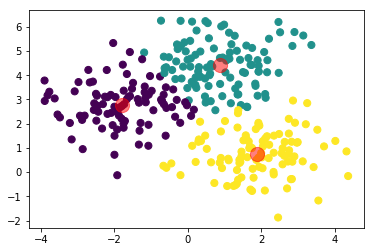

In [28]:
myLabels = labels.T
myCentroids = centroids.T

plt.scatter(x[:, 0], x[:, 1], c=myLabels, s=50)
plt.scatter(myCentroids[:, 0], myCentroids[:, 1], c='red', s=200, alpha=0.5)

Now lets compare precision of our K-means implementations and K-means built in Scikit-learn library.

First lets compute centroids using Scikit-learn K-means and then let's plot points and their class respectively.

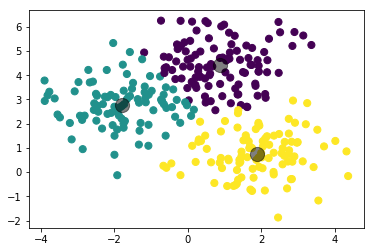

In [29]:
kmeans = KMeans(n_clusters=classesCount, random_state=0).fit(x)

sklearnLabels = kmeans.predict(x)
sklearnCentroids = kmeans.cluster_centers_

plt.scatter(x[:, 0], x[:, 1], c=sklearnLabels, s=50)
plt.scatter(sklearnCentroids[:, 0], sklearnCentroids[:, 1], c='black', s=200, alpha=0.5)

Using Adjusted Rand index lets compare how similar K-means results are to groundtruth labels.

In order not to reinvent the wheel, lets use already created adjusted_rand_score from Scikit-learn library.

In [30]:
print("Sklearn k-means precision: %f" % adjusted_rand_score(y, sklearnLabels))
print("My k-mean precision: %f" % adjusted_rand_score(y, myLabels))

Sklearn k-means precision: 0.766743
My k-mean precision: 0.766743
